<a href="https://colab.research.google.com/github/Masngo/Heart_disease_MediPredict-AI/blob/main/Heart_disease_MediPredict_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### This project focus on:

### Download the dataset from Kaggle,

### Preprocess & split the data,

### Train 3 ML models (Logistic Regression, Decision Tree, Random Forest),

### Evaluate using accuracy, precision, recall, F1, ROC-AUC,

### Show Confusion Matrix & ROC curve,

### Summarize results in a neat DataFrame.
### Google Colab Template: Disease Prediction Toolkit (Heart Disease)
### Step 1: Setup Kaggle API (to download dataset)
### Go to Kaggle
### Create API Token (this downloads kaggle.json).

### Upload it into Colab:
from google.colab import files
files.upload()   # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"masangodewheretsoko","key":"47e18475403f81264fdad9f31970a64c"}'}

In [2]:
### Move it into place and install Kaggle CLI:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install kaggle
!pip install kaggle


In [3]:
### Download the Heart Disease dataset:
!kaggle datasets download -d redwankarimsony/heart-disease-data
!unzip heart-disease-data.zip


Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 51.0MB/s]
Archive:  heart-disease-data.zip
  inflating: heart_disease_uci.csv   


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)


In [9]:
### Load Dataset
df = pd.read_csv("heart_disease_uci.csv")
print("Dataset Shape:", df.shape)
display(df.head())

Dataset Shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  

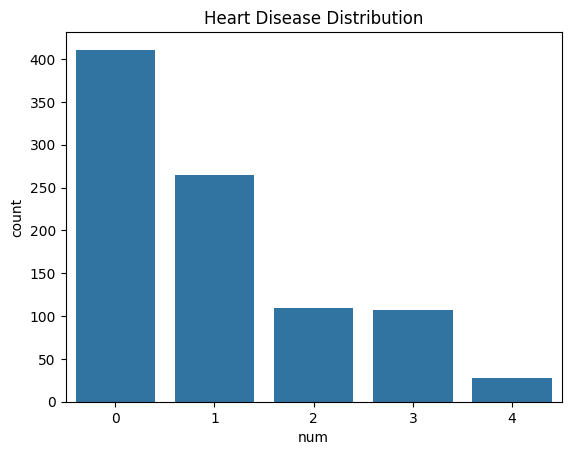

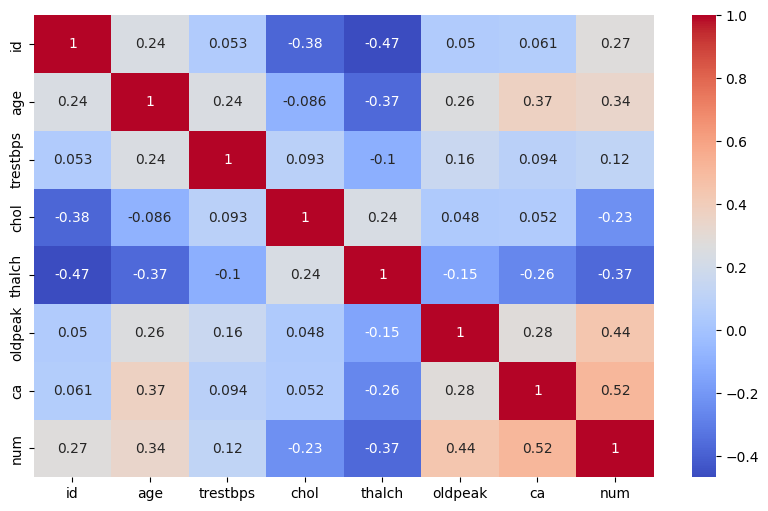

In [10]:
### EDA
print(df.info())
print(df.describe())

sns.countplot(x="num", data=df)
plt.title("Heart Disease Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [11]:
### Preprocessing
# Drop the 'ca' column due to a large number of missing values
df = df.drop("ca", axis=1)

# Impute missing values in numerical columns with the mean
for col in ["trestbps", "chol", "thalch", "oldpeak"]:
    df[col] = df[col].fillna(df[col].mean())

# Encode categorical features if needed
for col in df.select_dtypes(include=["object", "category"]):
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop("num", axis=1)
y = df["num"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
### Model Training
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    # Check if predict_proba exists before calling it
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        # Pass the full y_proba array for multiclass 'ovr' ROC AUC
        "ROC-AUC": roc_auc_score(y_test, y_proba, multi_class='ovr') if y_proba is not None else np.nan,
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

for name, res in results.items():
    print(f"\n--- {name} ---")
    for metric, val in res.items():
        if metric != "Confusion Matrix":
            print(f"{metric}: {val:.4f}")
    print("Confusion Matrix:\n", res["Confusion Matrix"])

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Logistic Regression ---
Accuracy: 0.6196
Precision: 0.5765
Recall: 0.6196
F1 Score: 0.5881
ROC-AUC: 0.8273
Confusion Matrix:
 [[71  8  2  1  0]
 [13 34  3  3  0]
 [ 5 10  4  3  0]
 [ 3 13  0  5  0]
 [ 0  3  1  2  0]]

--- Decision Tree ---
Accuracy: 0.6522
Precision: 0.6809
Recall: 0.6522
F1 Score: 0.6630
ROC-AUC: 0.6961
Confusion Matrix:
 [[67  6  6  3  0]
 [ 6 36  6  5  0]
 [ 1  3 10  7  1]
 [ 0  7  7  6  1]
 [ 0  0  3  2  1]]

--- Random Forest ---
Accuracy: 0.6630
Precision: 0.6295
Recall: 0.6630
F1 Score: 0.6449
ROC-AUC: 0.8724
Confusion Matrix:
 [[71  9  2  0  0]
 [ 7 38  5  3  0]
 [ 5  4  8  5  0]
 [ 3  9  4  5  0]
 [ 0  0  2  4  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
### Visualization
# ROC Curve for Random Forest (Multiclass handled in a separate cell)
# The code below is commented out as roc_curve is for binary classification
# best_model = models["Random Forest"]
# y_proba = best_model.predict_proba(X_test)[:,1]

# fpr, tpr, _ = roc_curve(y_test, y_proba)
# roc_auc = roc_auc_score(y_test, y_proba)

# plt.figure(figsize=(6,4))
# plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
# plt.plot([0,1], [0,1], "k--")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve - Random Forest")
# plt.legend()
# plt.show()

In [14]:
### Summary
import pandas as pd
summary = pd.DataFrame(results).T.drop("Confusion Matrix", axis=1)
summary


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.619565,0.576536,0.619565,0.588069,0.827336
Decision Tree,0.652174,0.680917,0.652174,0.662976,0.696115
Random Forest,0.663043,0.629466,0.663043,0.644934,0.872437


In [15]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=summary)

https://docs.google.com/spreadsheets/d/1i8M6oebSoEkhmxdqe7A1lOVZop205dg5-VOoonANol8/edit#gid=0


In [16]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=summary)

https://docs.google.com/spreadsheets/d/1vg-KX0NAwfGqbuYCzjp0u_1i3vIQ8fmjcDhjogGb42k/edit#gid=0


In [17]:
### Extended Google Colab Template with GridSearchCV
### Continue from the previous notebook after Previous cell (Summary).
### Hyperparameter Tuning - Decision Tree
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
param_grid_dt = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", grid_dt.best_params_)
print("Best CV Score:", grid_dt.best_score_)

# Evaluate on test data
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print("\nOptimized Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))


Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 10}
Best CV Score: 0.6276889134031991

Optimized Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        82
           1       0.62      0.66      0.64        53
           2       0.17      0.18      0.17        22
           3       0.11      0.10      0.10        21
           4       0.00      0.00      0.00         6

    accuracy                           0.60       184
   macro avg       0.34      0.36      0.35       184
weighted avg       0.57      0.60      0.59       184



In [18]:
### Hyperparameter Tuning - Random Forest
# Define parameter grid for Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5, 10],
    "bootstrap": [True, False]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)

# Evaluate on test data
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\nOptimized Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))


Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best CV Score: 0.649503585217871

Optimized Random Forest Performance:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        82
           1       0.66      0.70      0.68        53
           2       0.23      0.23      0.23        22
           3       0.25      0.24      0.24        21
           4       0.00      0.00      0.00         6

    accuracy                           0.64       184
   macro avg       0.39      0.41      0.40       184
weighted avg       0.61      0.64      0.63       184



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/tmp/ipython-input-2512355499.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")


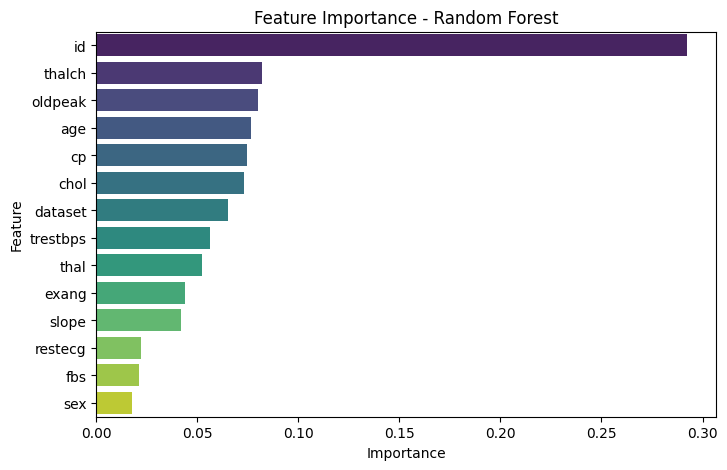

In [19]:
### Feature Importance (for Random Forest)
### Get feature importance
importances = best_rf.feature_importances_
features = X.columns

feat_df = pd.DataFrame({"Feature": features, "Importance": importances})
feat_df = feat_df.sort_values("Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.show()


In [20]:
### Dataset Insights (Exploratory Data Analysis)
### Age Distribution
def plot_age_distribution(df):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.histplot(df['age'], bins=20, kde=True, color='teal', ax=ax)
    ax.set_title("Age Distribution of Patients")
    plt.show() # Display the plot directly in Colab

### Gender vs Disease
import seaborn as sns
import matplotlib.pyplot as plt
# import streamlit as st # Removed streamlit import

def plot_correlation_heatmap(df):
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
    ax.set_title("Correlation Between Features", fontsize=14)
    plt.show()  # Display the plot directly in Colab


## Medical Feature Correlations
### Correlation Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
# import streamlit as st # Removed streamlit import

def plot_gender_disease(df):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(6, 4))

    # Create a count plot
    sns.countplot(data=df, x='sex', hue='num', palette="Set2", ax=ax) # Changed 'target' to 'num' based on the dataframe column name

    # Set x-tick labels (Assuming 0: Female, 1: Male based on previous cells)
    ax.set_xticklabels(["Female", "Male"])

    # Set the title of the plot
    ax.set_title("Heart Disease by Gender")

    # Display the plot in Colab
    plt.show()

In [23]:
!ls

heart-disease-data.zip	heart_disease_uci.csv  kaggle.json  sample_data


In [24]:
import joblib

# Save the trained Random Forest model
joblib.dump(best_rf, "heart_disease_model.pkl")

print("✅ Model saved as heart_disease_model.pkl")

✅ Model saved as heart_disease_model.pkl


In [25]:
### Download the Model to Your Computer
from google.colab import files
files.download("heart_disease_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
import joblib

# Save the trained Random Forest model
joblib.dump(best_rf, "heart_disease_model.pkl")

print("✅ Model saved as heart_disease_model.pkl")



✅ Model saved as heart_disease_model.pkl


In [27]:
### Final Results Summary
# Collect optimized model results
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

opt_results = {
    "Optimized Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Optimized Random Forest": accuracy_score(y_test, y_pred_rf)
}

print("Final Optimized Results:", opt_results)

Final Optimized Results: {'Optimized Decision Tree': 0.5978260869565217, 'Optimized Random Forest': 0.6413043478260869}


In [29]:
### Load the Model Later
# Load saved model
loaded_model = joblib.load("heart_disease_model.pkl")

# Test prediction
sample = X_test[0].reshape(1, -1)   # first sample from test data
print("Prediction for sample:", loaded_model.predict(sample))

Prediction for sample: [1]


In [30]:
### Step 1: Prepare the Model and Scaler
import joblib
# Assuming `best_rf` is your trained model and `scaler` is your StandardScaler
joblib.dump(best_rf, "heart_disease_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Model and Scaler saved successfully.")


✅ Model and Scaler saved successfully.
